# Implementasi Algoritma Decision Tree dalam Penentuan Klasifikasi Obat Yang Optimal Berdasarkan Kondisi Fisiologis Pasien

 [Data](https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees)

## Library

In [3]:
library(dplyr)
library(caret)
library(rpart.plot)
library(DataExplorer)
library(tidyverse)
library(corrplot)
library(ggplot2)
library(reshape2)

## Read data & data Stucture

In [4]:
myData <- read.csv('drug200.csv', stringsAsFactors = TRUE)
str(myData)

'data.frame':	200 obs. of  6 variables:
 $ Age        : int  23 47 47 28 61 22 49 41 60 43 ...
 $ Sex        : Factor w/ 2 levels "F","M": 1 2 2 1 1 1 1 2 2 2 ...
 $ BP         : Factor w/ 3 levels "HIGH","LOW","NORMAL": 1 2 2 3 2 3 3 2 3 2 ...
 $ Cholesterol: Factor w/ 2 levels "HIGH","NORMAL": 1 1 1 1 1 1 1 1 1 2 ...
 $ Na_to_K    : num  25.4 13.1 10.1 7.8 18 ...
 $ Drug       : Factor w/ 5 levels "drugA","drugB",..: 5 3 3 4 5 4 5 3 5 5 ...


# Ekplorasi Data

## Cek missing value

In [5]:
colSums(is.na(myData))

Age         Sex          BP Cholesterol     Na_to_K        Drug 
          0           0           0           0           0           0

## Analisis Deskriptif Awal

In [6]:
summary(myData)

      Age        Sex          BP     Cholesterol     Na_to_K          Drug   
 Min.   :15.00   F: 96   HIGH  :77   HIGH  :103   Min.   : 6.269   drugA:23  
 1st Qu.:31.00   M:104   LOW   :64   NORMAL: 97   1st Qu.:10.445   drugB:16  
 Median :45.00           NORMAL:59                Median :13.937   drugC:16  
 Mean   :44.31                                    Mean   :16.084   drugX:54  
 3rd Qu.:58.00                                    3rd Qu.:19.380   drugY:91  
 Max.   :74.00                                    Max.   :38.247             

## Visualisasi Data

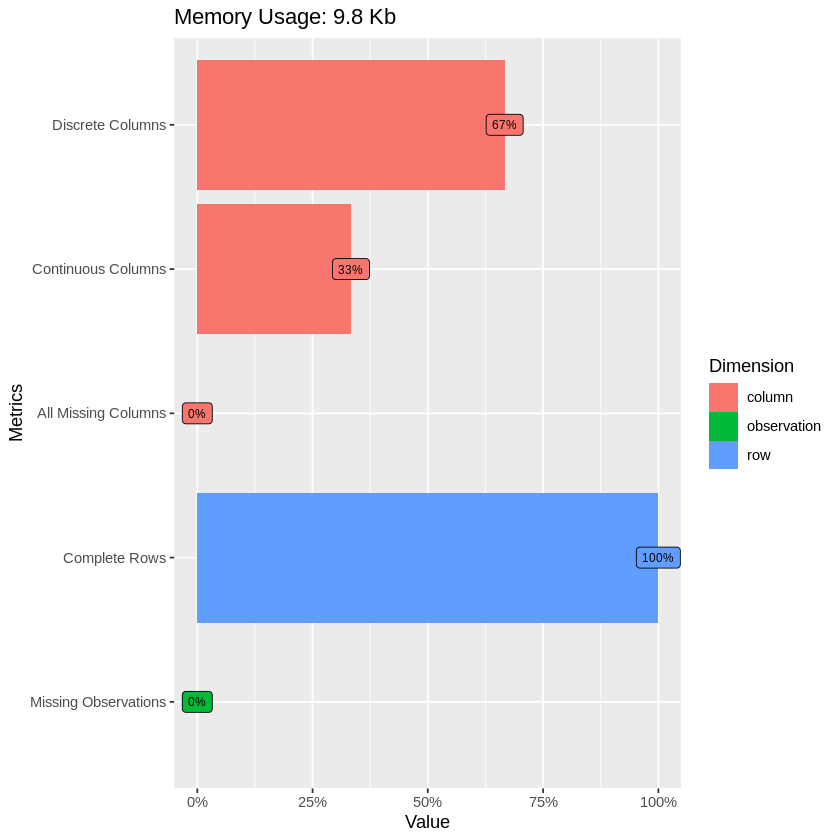

In [7]:
plot_intro(data = myData,
           geom_label_args = list(size=2.5))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


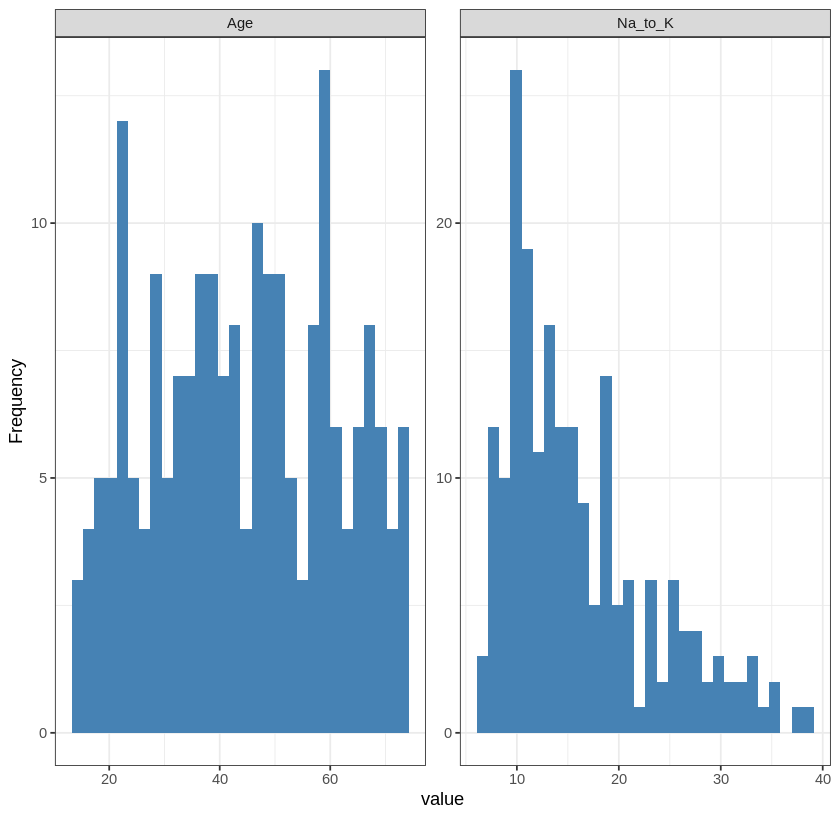

In [8]:
plot_histogram(data = myData,nrow=3,ncol = 3,
               geom_histogram_args = list(fill="steelblue"),
               ggtheme = theme_bw()
)

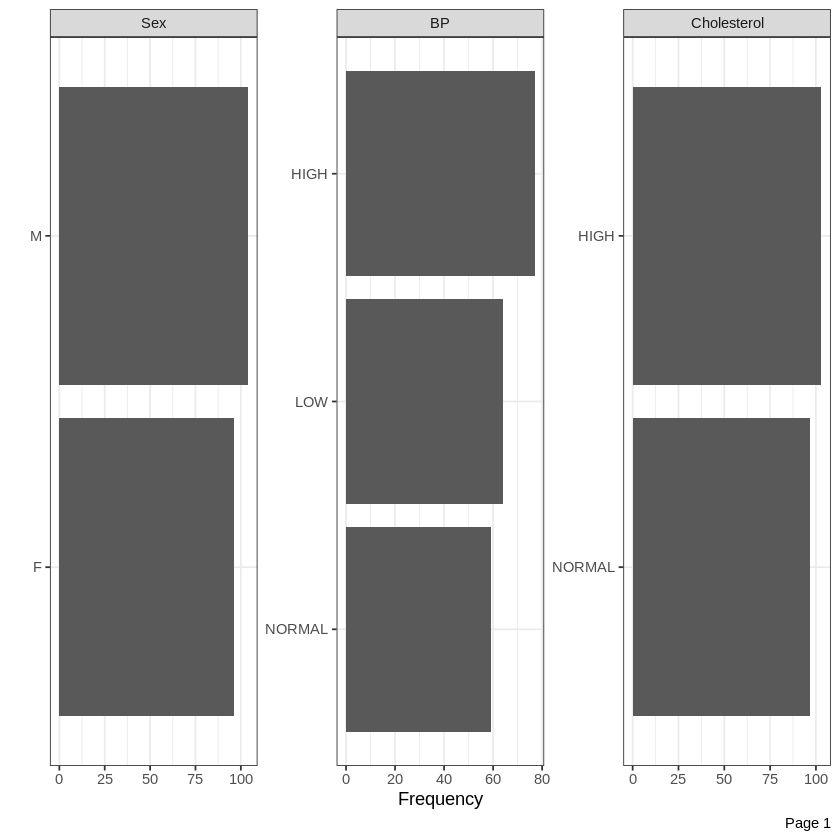

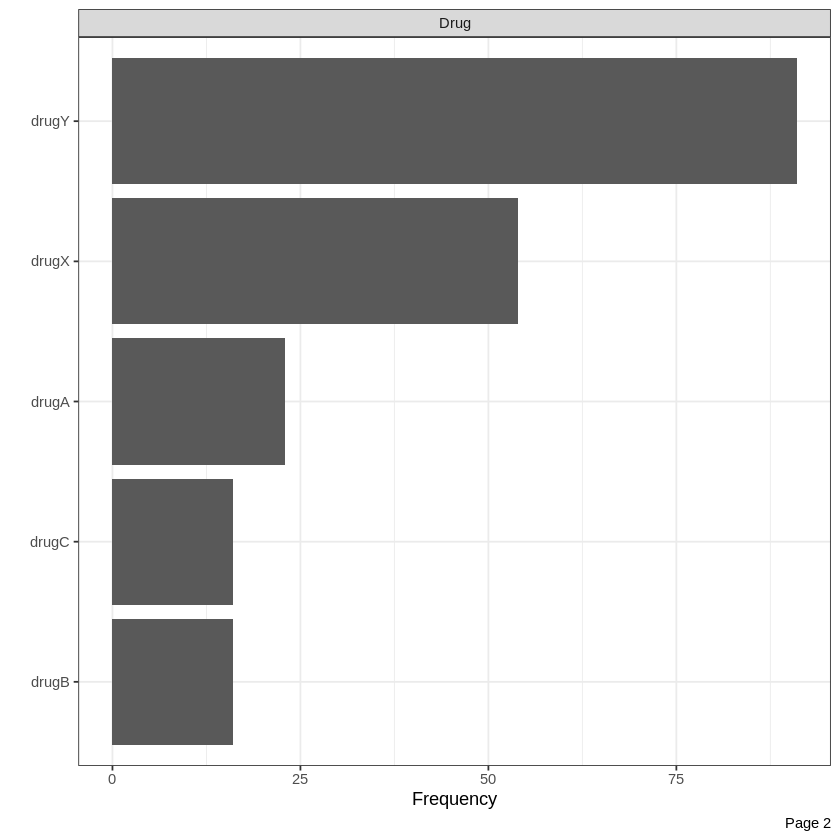

In [9]:
plot_bar(data = myData,ggtheme =theme_bw(),nrow = 1)

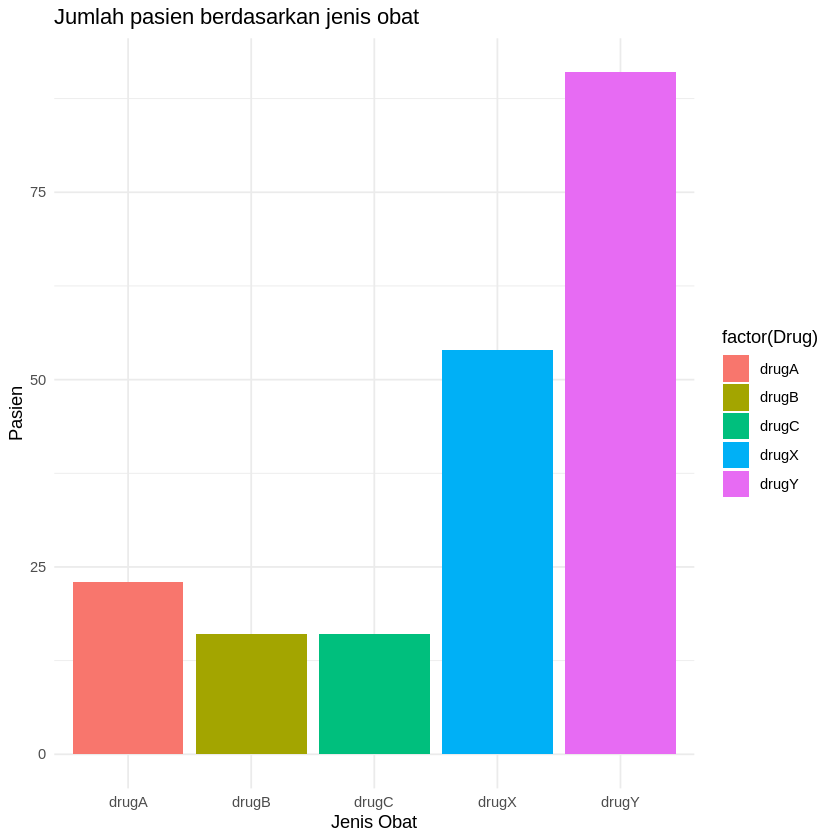

In [10]:
ggplot(myData, aes(x = factor(Drug), fill = factor(Drug))) +
  geom_bar() +
  labs(title = "Jumlah pasien berdasarkan jenis obat", x = "Jenis Obat", y = "Pasien") +
  theme_minimal()

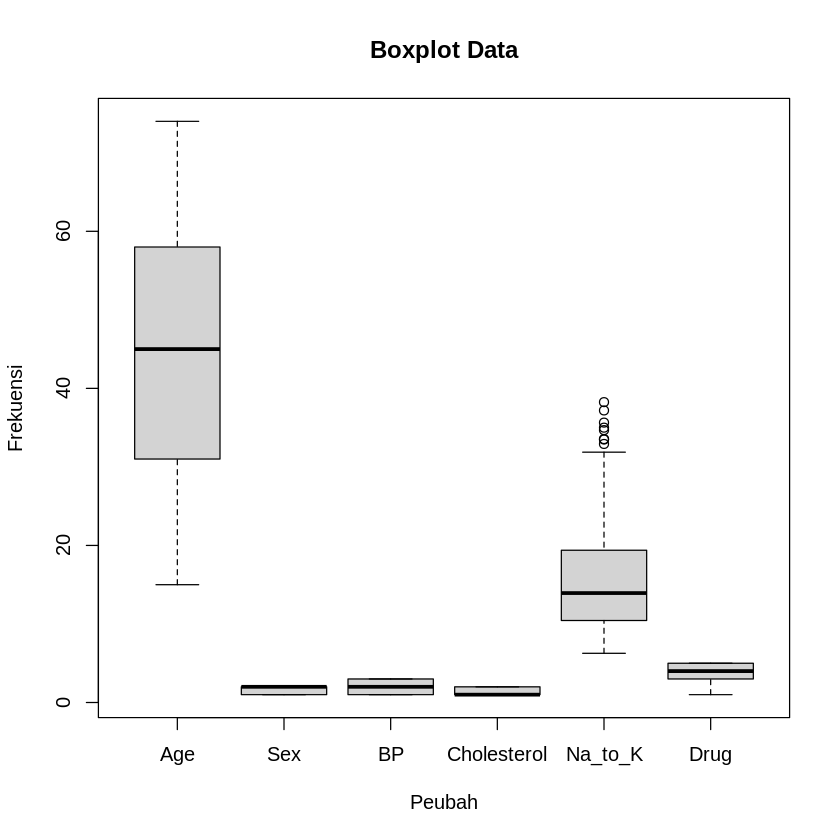

In [11]:
boxplot(myData, main="Boxplot Data", xlab= "Peubah" , ylab="Frekuensi")

## Korelasi

In [12]:
mydata2 <- myData %>%
  mutate(Age = as.numeric(Age),
         Sex = as.numeric(Sex),
         BP = as.numeric(BP),
         Cholesterol = as.numeric(Cholesterol),
         Drug = as.numeric(Drug))

In [13]:
r<-cor(mydata2)
r

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000000,0.102027361,0.054212403,-0.068233868,-0.06311950,-0.004828196
Sex,0.102027361,1.000000000,-0.007814035,-0.008811014,-0.12500849,-0.098572807
BP,0.054212403,-0.007814035,1.000000000,-0.137552065,-0.14931155,0.372867956
Cholesterol,-0.068233868,-0.008811014,-0.137552065,1.000000000,0.01000045,0.055628800
Na_to_K,-0.063119497,-0.125008493,-0.149311547,0.010000452,1.00000000,0.589119866
Drug,-0.004828196,-0.098572807,0.372867956,0.055628800,0.58911987,1.000000000


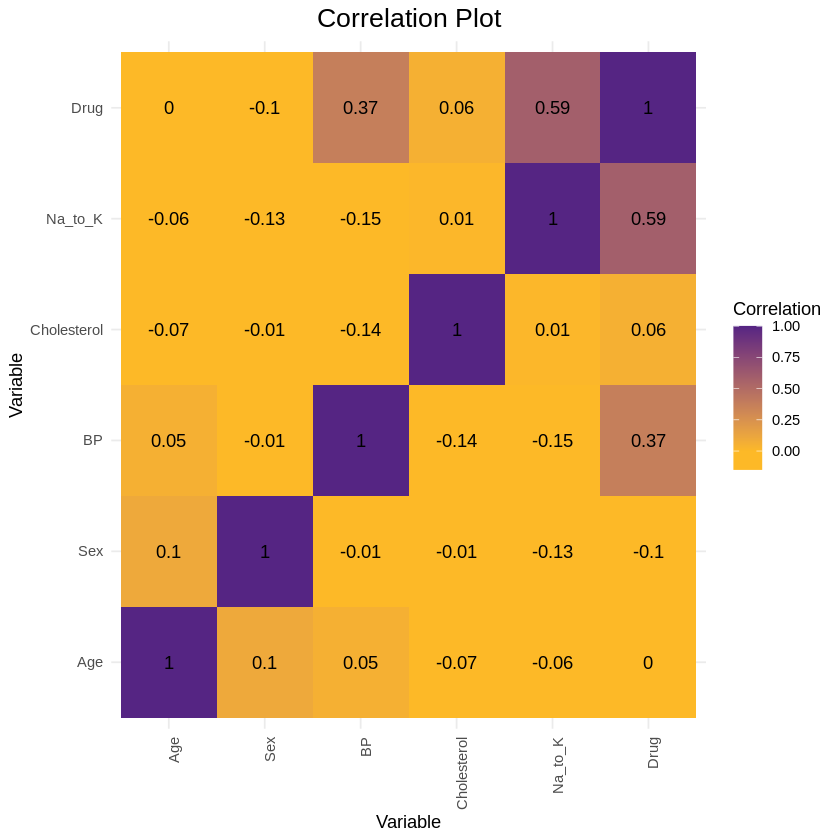

In [14]:
# Membuat correlation plot dengan penambahan nilai confusion matrix
cor_plot <- ggplot(data = melt(r), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#FDB927", mid = "#FDB927", high = "#552583", midpoint = 0) +
  geom_text(aes(label = round(value, 2)), color = "black") +
  labs(x = "Variable", y = "Variable", fill = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        plot.title = element_text(hjust = 0.5, size = 16))

# Menambahkan judul dan memperbesar font di luar plot
cor_plot <- cor_plot + ggtitle("Correlation Plot")

# Menampilkan correlation plot
print(cor_plot)

# Tree

In [15]:
set.seed(3)
intrain <- createDataPartition(y= myData$Drug, p=.7, list = FALSE)
training <- myData[intrain, ]
testing <- myData[-intrain, ]

In [16]:
trctrl <- trainControl(method ='repeatedcv', number = 10, repeats = 3)
set.seed(3)
dtree_fit <- train(Drug ~., data =training,
                   method = "rpart",
                   parms = list(split ="information"),
                   trControl = trctrl,
                   tuneLength = 10)
dtree_fit

CART 

143 samples
  5 predictor
  5 classes: 'drugA', 'drugB', 'drugC', 'drugX', 'drugY' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 129, 129, 129, 128, 131, 128, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9864881  0.9806381
  0.05344585  0.9864881  0.9806381
  0.10689170  0.9864881  0.9806381
  0.16033755  0.7145055  0.5628388
  0.21378340  0.7145055  0.5628388
  0.26722925  0.7145055  0.5628388
  0.32067511  0.7145055  0.5628388
  0.37412096  0.7145055  0.5628388
  0.42756681  0.7145055  0.5628388
  0.48101266  0.5301404  0.1728551

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.1068917.

## Visualisasi Decision Tree

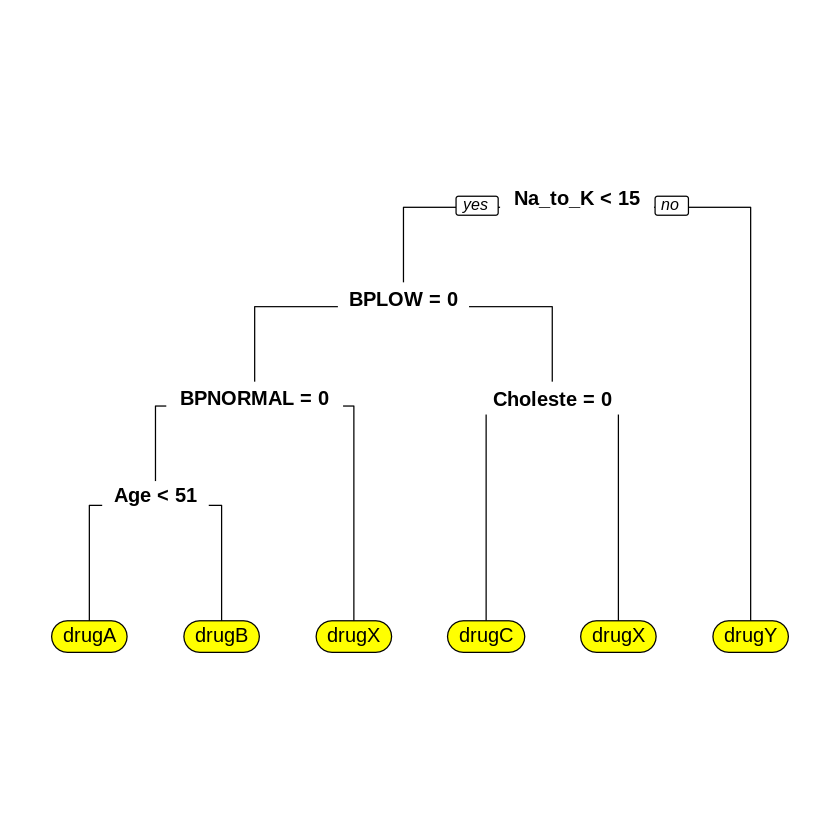

In [17]:
prp(dtree_fit$finalModel, extra = 0, box.palette = "yellow", tweak = 1.0, fallen.leaves=TRUE)

## Model prediction and testing

In [18]:
testing[1, ]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>
2,47,M,LOW,HIGH,13.093,drugC


In [19]:
predict(dtree_fit, newdata = testing[1, ])

[1] drugC
Levels: drugA drugB drugC drugX drugY

## Evaluasi Performa Model

### Confusion Matrix

In [20]:
test_pred <- predict(dtree_fit, newdata = testing)
confusionMatrix(test_pred, as.factor(testing$Drug)) #check accuracy

Confusion Matrix and Statistics

          Reference
Prediction drugA drugB drugC drugX drugY
     drugA     6     0     0     0     0
     drugB     0     4     0     0     0
     drugC     0     0     4     0     0
     drugX     0     0     0    15     0
     drugY     0     0     0     1    27

Overall Statistics
                                          
               Accuracy : 0.9825          
                 95% CI : (0.9061, 0.9996)
    No Information Rate : 0.4737          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9739          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       0.9375
Specificity                1.0000      1.00000      1.00000       1.0000
Pos Pred Value             1.0000      1.00000      

Dengan akurasi 0.9825 atau 98.25% dapat disimpulkan kalau model ini bekerja dengna baik untuk pengklasifikasian obat yang optimal berdasarkan kondisi fisiologis pasien, Namun keakuratan ini dapat terjadi dengan asumsi data yang tidak asli atau dummy sehingga memungkinkan pembuat data membuat data yang optimal dalam penerapan algoritma decision tree